In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [2]:
# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)


In [3]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Close"]]
stk_data 

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2021-07-01,746.450012
2021-07-02,750.650024
2021-07-05,760.349976
2021-07-06,758.349976
2021-07-07,762.900024
...,...
2022-01-19,729.599976
2022-01-20,728.900024
2022-01-21,712.500000


In [4]:
# Normalize data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Close"])
data1

,Close
0,0.491495
1,0.513145
2,0.563144
3,0.552835
4,0.576289
...,...
138,0.404639
139,0.401031
140,0.316495
141,0.275773


In [5]:
# Train-test split
training_size = round(len(data1) * 0.50)
train_data, test_data = data1[:training_size], data1[training_size:]


In [6]:
# Fit ARIMA model
order = (8, 1, 7)  # (p, d, q) where p=AR lags, d=differencing, q=MA lags
model = ARIMA(train_data['Close'], order=order)
model_fit = model.fit()

# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)
forecast

C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


72     0.739116
73     0.722710
74     0.711185
75     0.714265
76     0.716868
         ...   
138    0.704368
139    0.704380
140    0.704390
141    0.704383
142    0.704376
Name: predicted_mean, Length: 71, dtype: float64

In [7]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Close'])

# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)


In [8]:
forecast_df

,Close
72,NaN
73,NaN
74,NaN
75,NaN
76,NaN
...,...
138,NaN
139,NaN
140,NaN
141,NaN


In [9]:
forecast_df_inv

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [10]:
test_data_inv

array([[802.04998779],
       [813.29998779],
       [801.65002441],
       [804.79998779],
       [807.79998779],
       [816.70001221],
       [845.09997559],
       [841.90002441],
       [787.5       ],
       [758.34997559],
       [742.        ],
       [752.34997559],
       [755.84997559],
       [750.59997559],
       [752.95001221],
       [751.04998779],
       [745.04998779],
       [749.34997559],
       [738.04998779],
       [736.04998779],
       [733.25      ],
       [726.15002441],
       [712.34997559],
       [706.34997559],
       [686.40002441],
       [685.65002441],
       [685.15002441],
       [679.90002441],
       [661.75      ],
       [651.09997559],
       [655.65002441],
       [679.59997559],
       [676.09997559],
       [673.        ],
       [663.09997559],
       [687.        ],
       [697.09997559],
       [693.95001221],
       [688.04998779],
       [704.        ],
       [710.90002441],
       [712.5       ],
       [709.65002441],
       [688

In [11]:
# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Close"])


In [12]:
# Check for NaN or infinite values
if np.any(np.isnan(forecast_df_inv)) or np.any(np.isinf(forecast_df_inv)):
    print("Forecast contains NaN or infinite values. Please check the model or data preprocessing steps.")
else:
    # Evaluation
    print("Evaluating Close prices")
    rmsemape(test_data_inv['Close'], forecast_df_inv['Close'])
    print("************")


Forecast contains NaN or infinite values. Please check the model or data preprocessing steps.


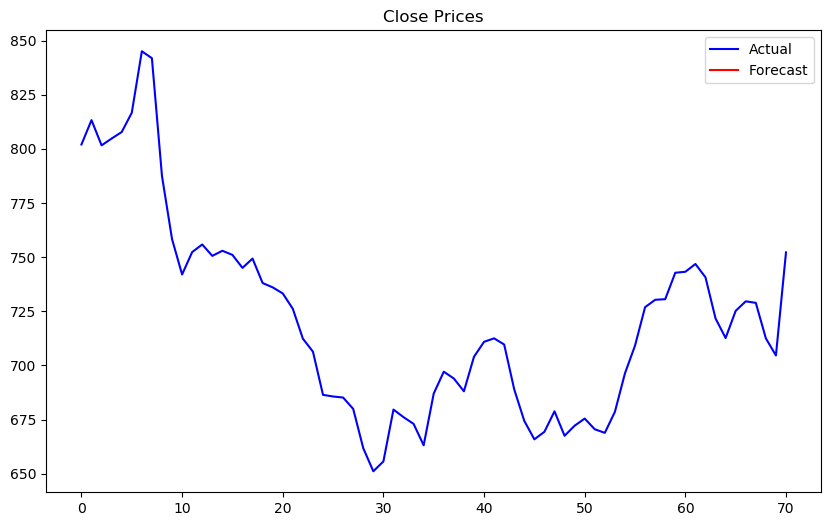

In [13]:
    # Plotting results
    plt.figure(figsize=(10, 6))
    plt.plot(test_data_inv['Close'], label='Actual', color='blue')
    plt.plot(forecast_df_inv['Close'], label='Forecast', color='red')
    plt.title('Close Prices')
    plt.legend()
    plt.show()
